In [1]:
# use matplotlib to visualize the downsampled stack
%matplotlib qt
# get the stack and downsample it
from deeptrace import *
from deeptrace.plotting import *
import time
tstart = time.time()
stack = BrainStack(['D:\\WholeBrain\\sampledata\\210723_NAc326F_488_s3_0_8x_13-31-25',
                  'D:\\WholeBrain\\sampledata\\210723_NAc326F_640_s3_0_8x_11-50-51'])

from tqdm.notebook import tqdm

pbar = tqdm()

res = stack.deeptrace_analysis(angles = None,
                               trailmap_models = [f for f in np.sort(trailmap_list_models())[:3]],
                               pbar = pbar)

pbar.close()
print(time.time() - tstart)

0it [00:00, ?it/s]

[DeepTraCE] Rotation angles are not set, please select at least one angle.
Downsampling channel 0 to D:\WholeBrain\sampledata\deeptrace_analysis\210723_NAc326F_488_s3_0_8x_13-31-25\scaled\210723_NAc326F_488_s3_0_8x_13-31-25.tif.
413.6303060054779


In [2]:
res

{'x': array([[nan, nan, nan],
        [nan, nan, nan]], dtype=float32),
 'y': array([[nan, nan, nan],
        [nan, nan, nan]], dtype=float32),
 'z': array([[154., 443., 456.],
        [249., 675., 474.]], dtype=float32),
 'angles': [4.436474, 0, 0]}

In [ ]:
# Discover the angles using the blood vessels.
res = interact_find_angles(raw.downsampled_data[0]);

In [ ]:
# Apply the transform to the stack
Y = rotate_stack(raw.downsampled_data[0],
                 *res['angles'])
interact_show_stack(Y)

##### After data are analysed one can combine models and perform quantifications

In [1]:
from deeptrace import *
from deeptrace.plotting import *
%matplotlib inline

# load results
params,autof,models = load_deeptrace_models('../../../deeptrace_data/deeptrace_analysis/210723_NAc326F_488_s3_0_8x_13-31-25')
print("Combining models") 
combined,model_selection = combine_models(models,default_model=2)
print("Refining model using connected components analysis")
refined_model = refine_connected_components(combined)

Using matplotlib backend: TkAgg
Combining models
Refining model using connected components analysis


In [2]:
# Show refined and combined model
interact_show_stack(refined_model)

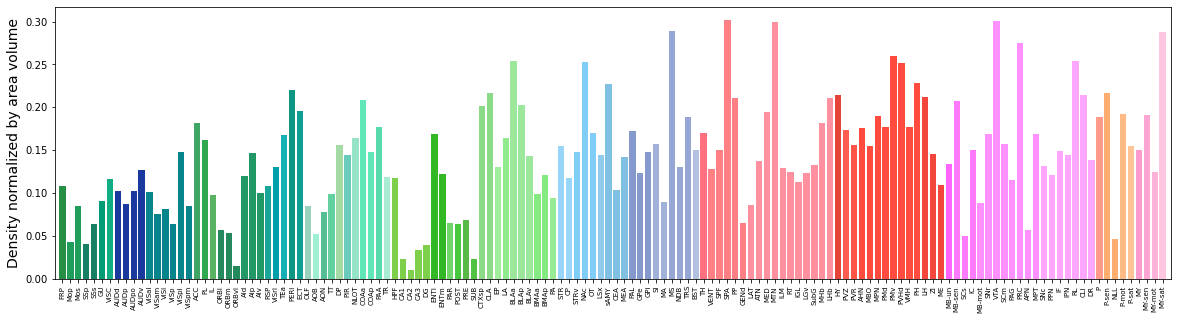

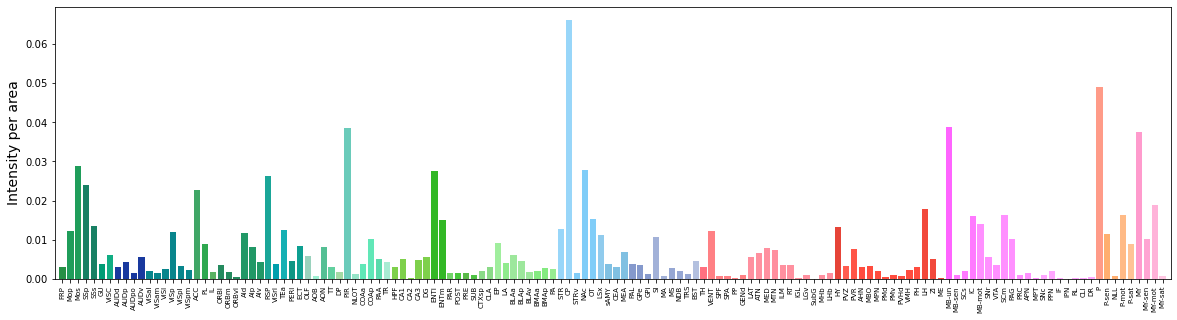

In [69]:
%matplotlib inline

plt.figure(figsize = [20,5])
plt.bar(np.arange(len(model_selection)),np.array(model_selection.density),color = model_selection.color)
plt.xticks(np.arange(len(model_selection)),model_selection.acronym,rotation = 90,fontsize = 7);
plt.xlim([-1,len(model_selection)])
plt.ylabel('Density normalized by area volume',fontsize = 14)

plt.figure(figsize = [20,5])
plt.bar(np.arange(len(model_selection)),model_selection.count_pixels/np.sum(model_selection.count_pixels),color = model_selection.color)
plt.xticks(np.arange(len(model_selection)),model_selection.acronym,rotation = 90,fontsize = 7);
plt.xlim([-1,len(model_selection)])
plt.ylabel('Intensity per area',fontsize = 14);

In [78]:
%matplotlib qt
# display the refined model and the atlas
interact_stack_overlay_areas(refined_model,atlas)

In [ ]:
# skeletonize models (this is done in "refine_models")
from tqdm.notebook import tqdm
#create binary matrices and skeletonize them
f = models[0]
res = skeletonize_multithreshold_uint8_stack(models[1])
